In [1]:
import calendar
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import plotly.graph_objs as go
from origami.preprocess import merged_syst_n2ex
from origami.visualise import (
    time_of_day_plot,
    day_of_week_plot,
    month_plot,
    column_compare_plot
)

In [2]:
dataset = merged_syst_n2ex(
    syst_path='data/systems_prices.csv',
    n2ex_path='data/n2ex_da_2018.csv'
)
dataset = dataset[dataset.datetime < '2019-01-01']
dataset.head()

,datetime,sell_price,buy_price,net_imbalance_volume,price
0,2018-01-01 00:30:00,55.94000,55.94000,38.5262,NaN
1,2018-01-01 01:00:00,55.94000,55.94000,167.3802,4714.0
2,2018-01-01 01:30:00,62.94000,62.94000,109.8918,4714.0
3,2018-01-01 02:00:00,31.00000,31.00000,-143.3171,5460.0
4,2018-01-01 02:30:00,60.81578,60.81578,70.7066,5460.0


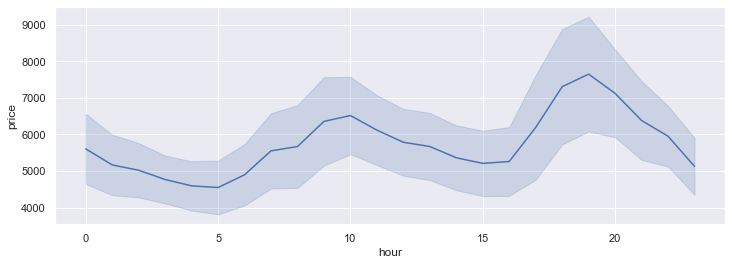

In [3]:
time_of_day_plot(dataset, time_column='datetime', agg_column='price')

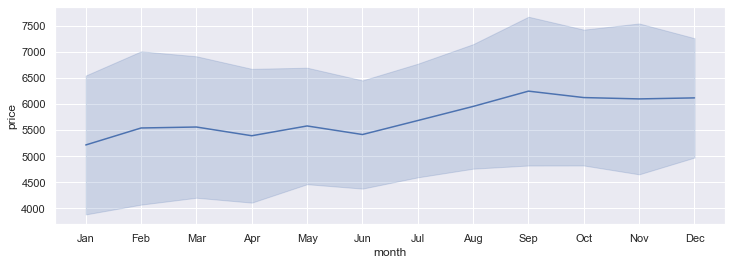

In [4]:
month_plot(dataset, 'datetime', 'price')

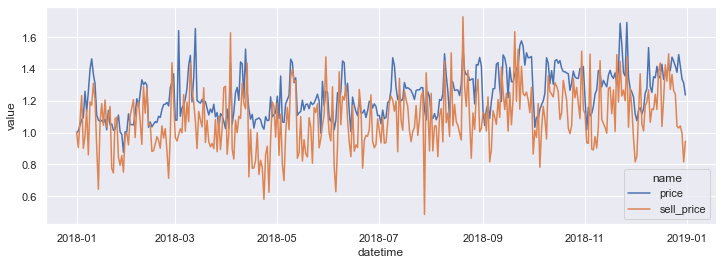

In [5]:
column_compare_plot(dataset, 'datetime', ['price', 'sell_price'], time_dim='D')

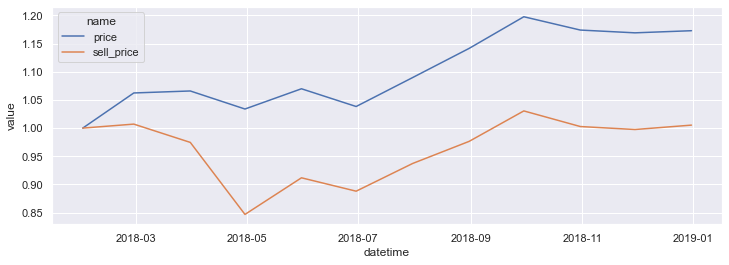

In [6]:
column_compare_plot(dataset, 'datetime', ['price', 'sell_price'], time_dim='M')

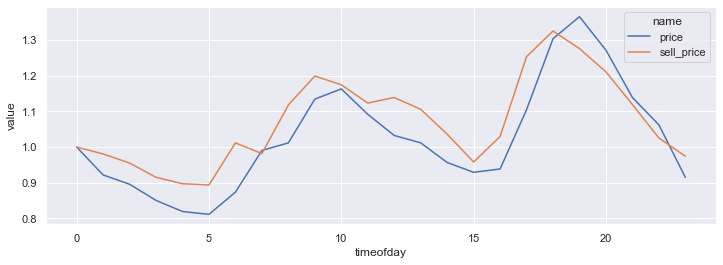

In [7]:
dow_compare = dataset.copy()
dow_compare['timeofday'] = dataset['datetime'].dt.hour
dow_compare = dow_compare.groupby('timeofday').mean().reset_index(drop=False)
column_compare_plot(
    dow_compare,
    group_column='timeofday',
    comparison_columns=['price', 'sell_price'],
    time_dim=None
)